___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Flask API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (flask api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Flask API***.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
plt.rcParams["figure.figsize"] = [8, 6]
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
pd.set_option("display.float", "{:.2f}".format)

In [2]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.00,-11.88,10.07,-9.83,-2.07,-5.36,-2.61,-4.92,7.31,1.91,...,0.21,0.11,1.01,-0.51,1.44,0.25,0.94,0.82,0.77,0
284803,172787.00,-0.73,-0.06,2.04,-0.74,0.87,1.06,0.02,0.29,0.58,...,0.21,0.92,0.01,-1.02,-0.61,-0.40,0.07,-0.05,24.79,0
284804,172788.00,1.92,-0.30,-3.25,-0.56,2.63,3.03,-0.30,0.71,0.43,...,0.23,0.58,-0.04,0.64,0.27,-0.09,0.00,-0.03,67.88,0
284805,172788.00,-0.24,0.53,0.70,0.69,-0.38,0.62,-0.69,0.68,0.39,...,0.27,0.80,-0.16,0.12,-0.57,0.55,0.11,0.10,10.00,0


### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

* ***Tüm data numerik değerlerden oluşuyor, kategorik sınıflandırma yapılmamış.***

In [4]:
print(df.Class.value_counts())
print("\n")
print(df.Class.value_counts(normalize=True) * 100)

0    284315
1       492
Name: Class, dtype: int64


0   99.83
1    0.17
Name: Class, dtype: float64


* ***Son derece imbalans bir data ile karşı karşıyayız. Çok az bir kesim hariç tüm işlemlerin normal (hilesiz) olduğu görülmekte. Bu şekilde bir varsayım ile yola çıktığımızda tahmin modellerimizde çok hata almamız veya skorların overfit olması beklenebilir. Fakat, biz modelimizin bu tip bir yaklaşım sergilemesinden ziyade, hileli yapılan işlemleri tespit etmesini istiyoruz.***

In [5]:
for i in df.iloc[:, 1:-1]:
    print("{} column differs between {} and {}".format(i, round(df[i].min(),2), round(df[i].max(),2)))

V1 column differs between -56.41 and 2.45
V2 column differs between -72.72 and 22.06
V3 column differs between -48.33 and 9.38
V4 column differs between -5.68 and 16.88
V5 column differs between -113.74 and 34.8
V6 column differs between -26.16 and 73.3
V7 column differs between -43.56 and 120.59
V8 column differs between -73.22 and 20.01
V9 column differs between -13.43 and 15.59
V10 column differs between -24.59 and 23.75
V11 column differs between -4.8 and 12.02
V12 column differs between -18.68 and 7.85
V13 column differs between -5.79 and 7.13
V14 column differs between -19.21 and 10.53
V15 column differs between -4.5 and 8.88
V16 column differs between -14.13 and 17.32
V17 column differs between -25.16 and 9.25
V18 column differs between -9.5 and 5.04
V19 column differs between -7.21 and 5.59
V20 column differs between -54.5 and 39.42
V21 column differs between -34.83 and 27.2
V22 column differs between -10.93 and 10.5
V23 column differs between -44.81 and 22.53
V24 column differ

* ***Transformed datanın değer aralıklarının belli bir standardı olmadığı, çok değişken aralıklarda oldukları görülmekte. Domain bilgisi olmayan bizler için bu sayısal veri bize çok birşey ifade etmiyor.***

In [6]:
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

In [103]:
amount_f_n = pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)  

col_names = ['Fraud', 'Normal']
amount_f_n.columns = col_names

amount_f_n

,Fraud,Normal
count,492.00000,284315.00000
mean,122.21000,88.29000
std,256.68000,250.11000
min,0.00000,0.00000
25%,1.00000,5.65000
50%,9.25000,22.00000
75%,105.89000,77.05000
max,2125.87000,25691.16000


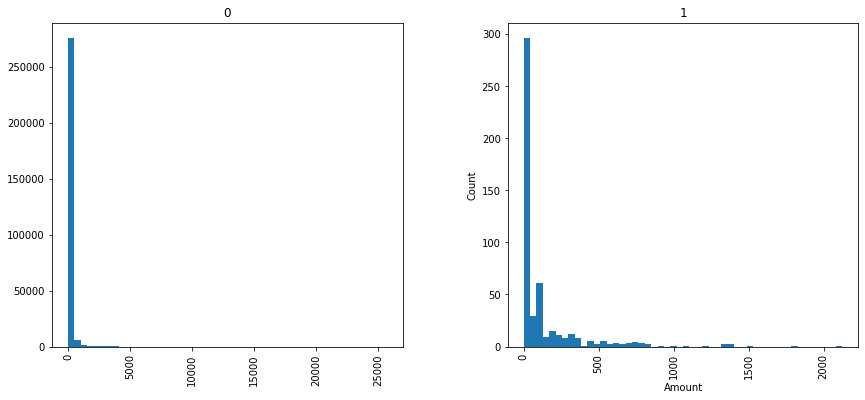

In [110]:
plt.rcParams["figure.figsize"] = [14, 6]
df['Amount'].hist(by=df['Class'], bins=50)
plt.xlabel("Amount")
plt.ylabel("Count");

* ***Hileli işlemlerin sayısı nispi olarak normal işlerlere kıyasla çok daha az olsa da miktar yelpazesinin daha geniş olduğu görülmekte. Normal işlemlerin miktar ortalaması 88 iken, hileli işlemlerin ortalaması 122 seviyelerinde görülmekte.***

In [112]:
time_f_n = pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

col_names = ['Fraud', 'Normal']
time_f_n.columns = col_names

time_f_n

,Fraud,Normal
count,492.00000,284315.00000
mean,80746.80691,94838.20226
std,47835.36514,47484.01579
min,406.00000,0.00000
25%,41241.50000,54230.00000
50%,75568.50000,84711.00000
75%,128483.00000,139333.00000
max,170348.00000,172792.00000


* ***İşlemler arası geçen zaman konusunda her iki türde de büyük farklılar yok.***

In [113]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.00000,94813.85958,47488.14595,0.00000,54201.50000,84692.00000,139320.50000,172792.00000
V1,284807.00000,0.00000,1.95870,-56.40751,-0.92037,0.01811,1.31564,2.45493
V2,284807.00000,0.00000,1.65131,-72.71573,-0.59855,0.06549,0.80372,22.05773
V3,284807.00000,-0.00000,1.51626,-48.32559,-0.89036,0.17985,1.02720,9.38256
V4,284807.00000,0.00000,1.41587,-5.68317,-0.84864,-0.01985,0.74334,16.87534
V5,284807.00000,-0.00000,1.38025,-113.74331,-0.69160,-0.05434,0.61193,34.80167
V6,284807.00000,0.00000,1.33227,-26.16051,-0.76830,-0.27419,0.39856,73.30163
V7,284807.00000,-0.00000,1.23709,-43.55724,-0.55408,0.04010,0.57044,120.58949
V8,284807.00000,-0.00000,1.19435,-73.21672,-0.20863,0.02236,0.32735,20.00721
V9,284807.00000,-0.00000,1.09863,-13.43407,-0.64310,-0.05143,0.59714,15.59499


* ***Çok az miktardaki hileli işlem sayısına bağlı olarak "highly skewed" bir data ile çalışıyoruz. Toplam 28 adaet, V1 ile V28 aralığında isimlendirilmiş ‘Principal Component Analysis (PCA)’ transformed feature sözkonusu. Konu hakkında meta data ya domain bilgimiz olmadığı için yeterli analiz yapılamadı.***
* ***"Time" ve "Amount" sütunleri transformed bir data değil.***

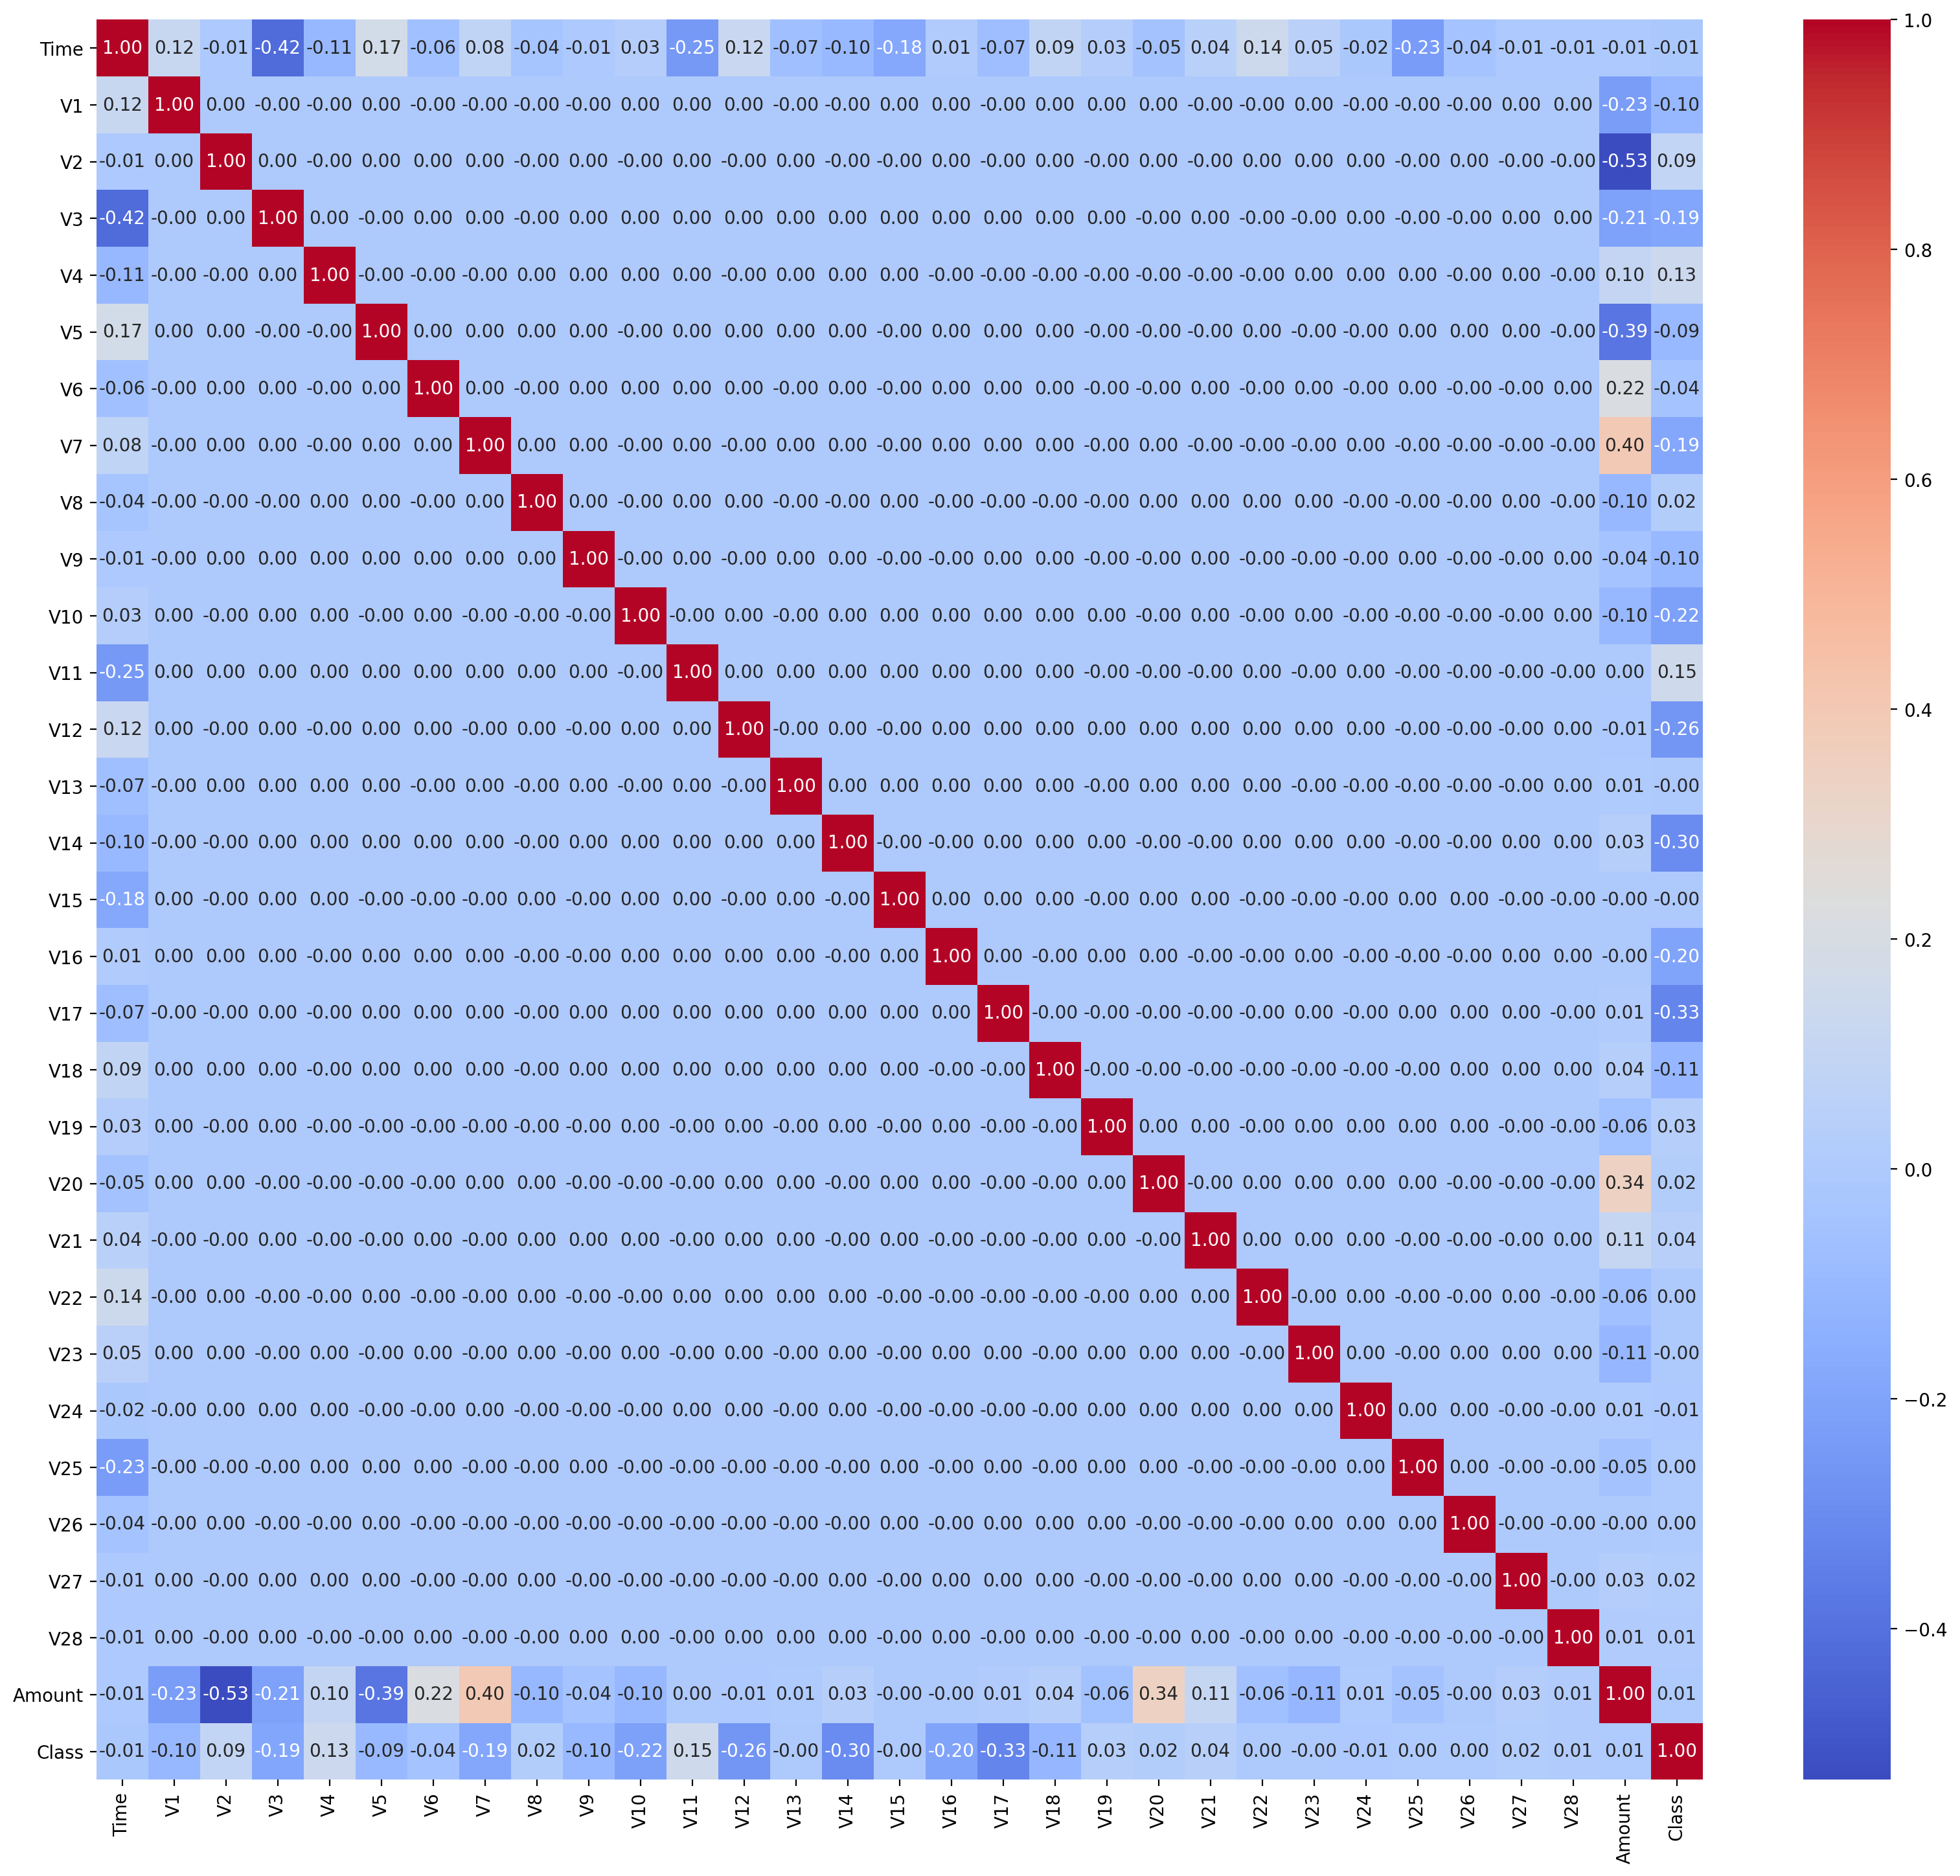

In [11]:
plt.figure(figsize=(20,18), dpi=200)
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f");

* ***Genel dataseti incelendiğinde, V1 ve V28 aralığımdaki feature'ların kendi aralarında herhangi bir ilişkisi olmadığı görülmekte. Dolayısıyla "Multicollinearity"'nin sözkonusu olmadığı PCA transformed bir datadan bahsediyoruz.  Diğer taraftan, hedef sütunumuz olan "Class" sütununun, "Time" ve "Amount" sütunları ile herhangi bir ilişkisi yokken, bazı V bileşenleri ile çok güçlü olmasa da ilişkili olduğu söylenebilir.***

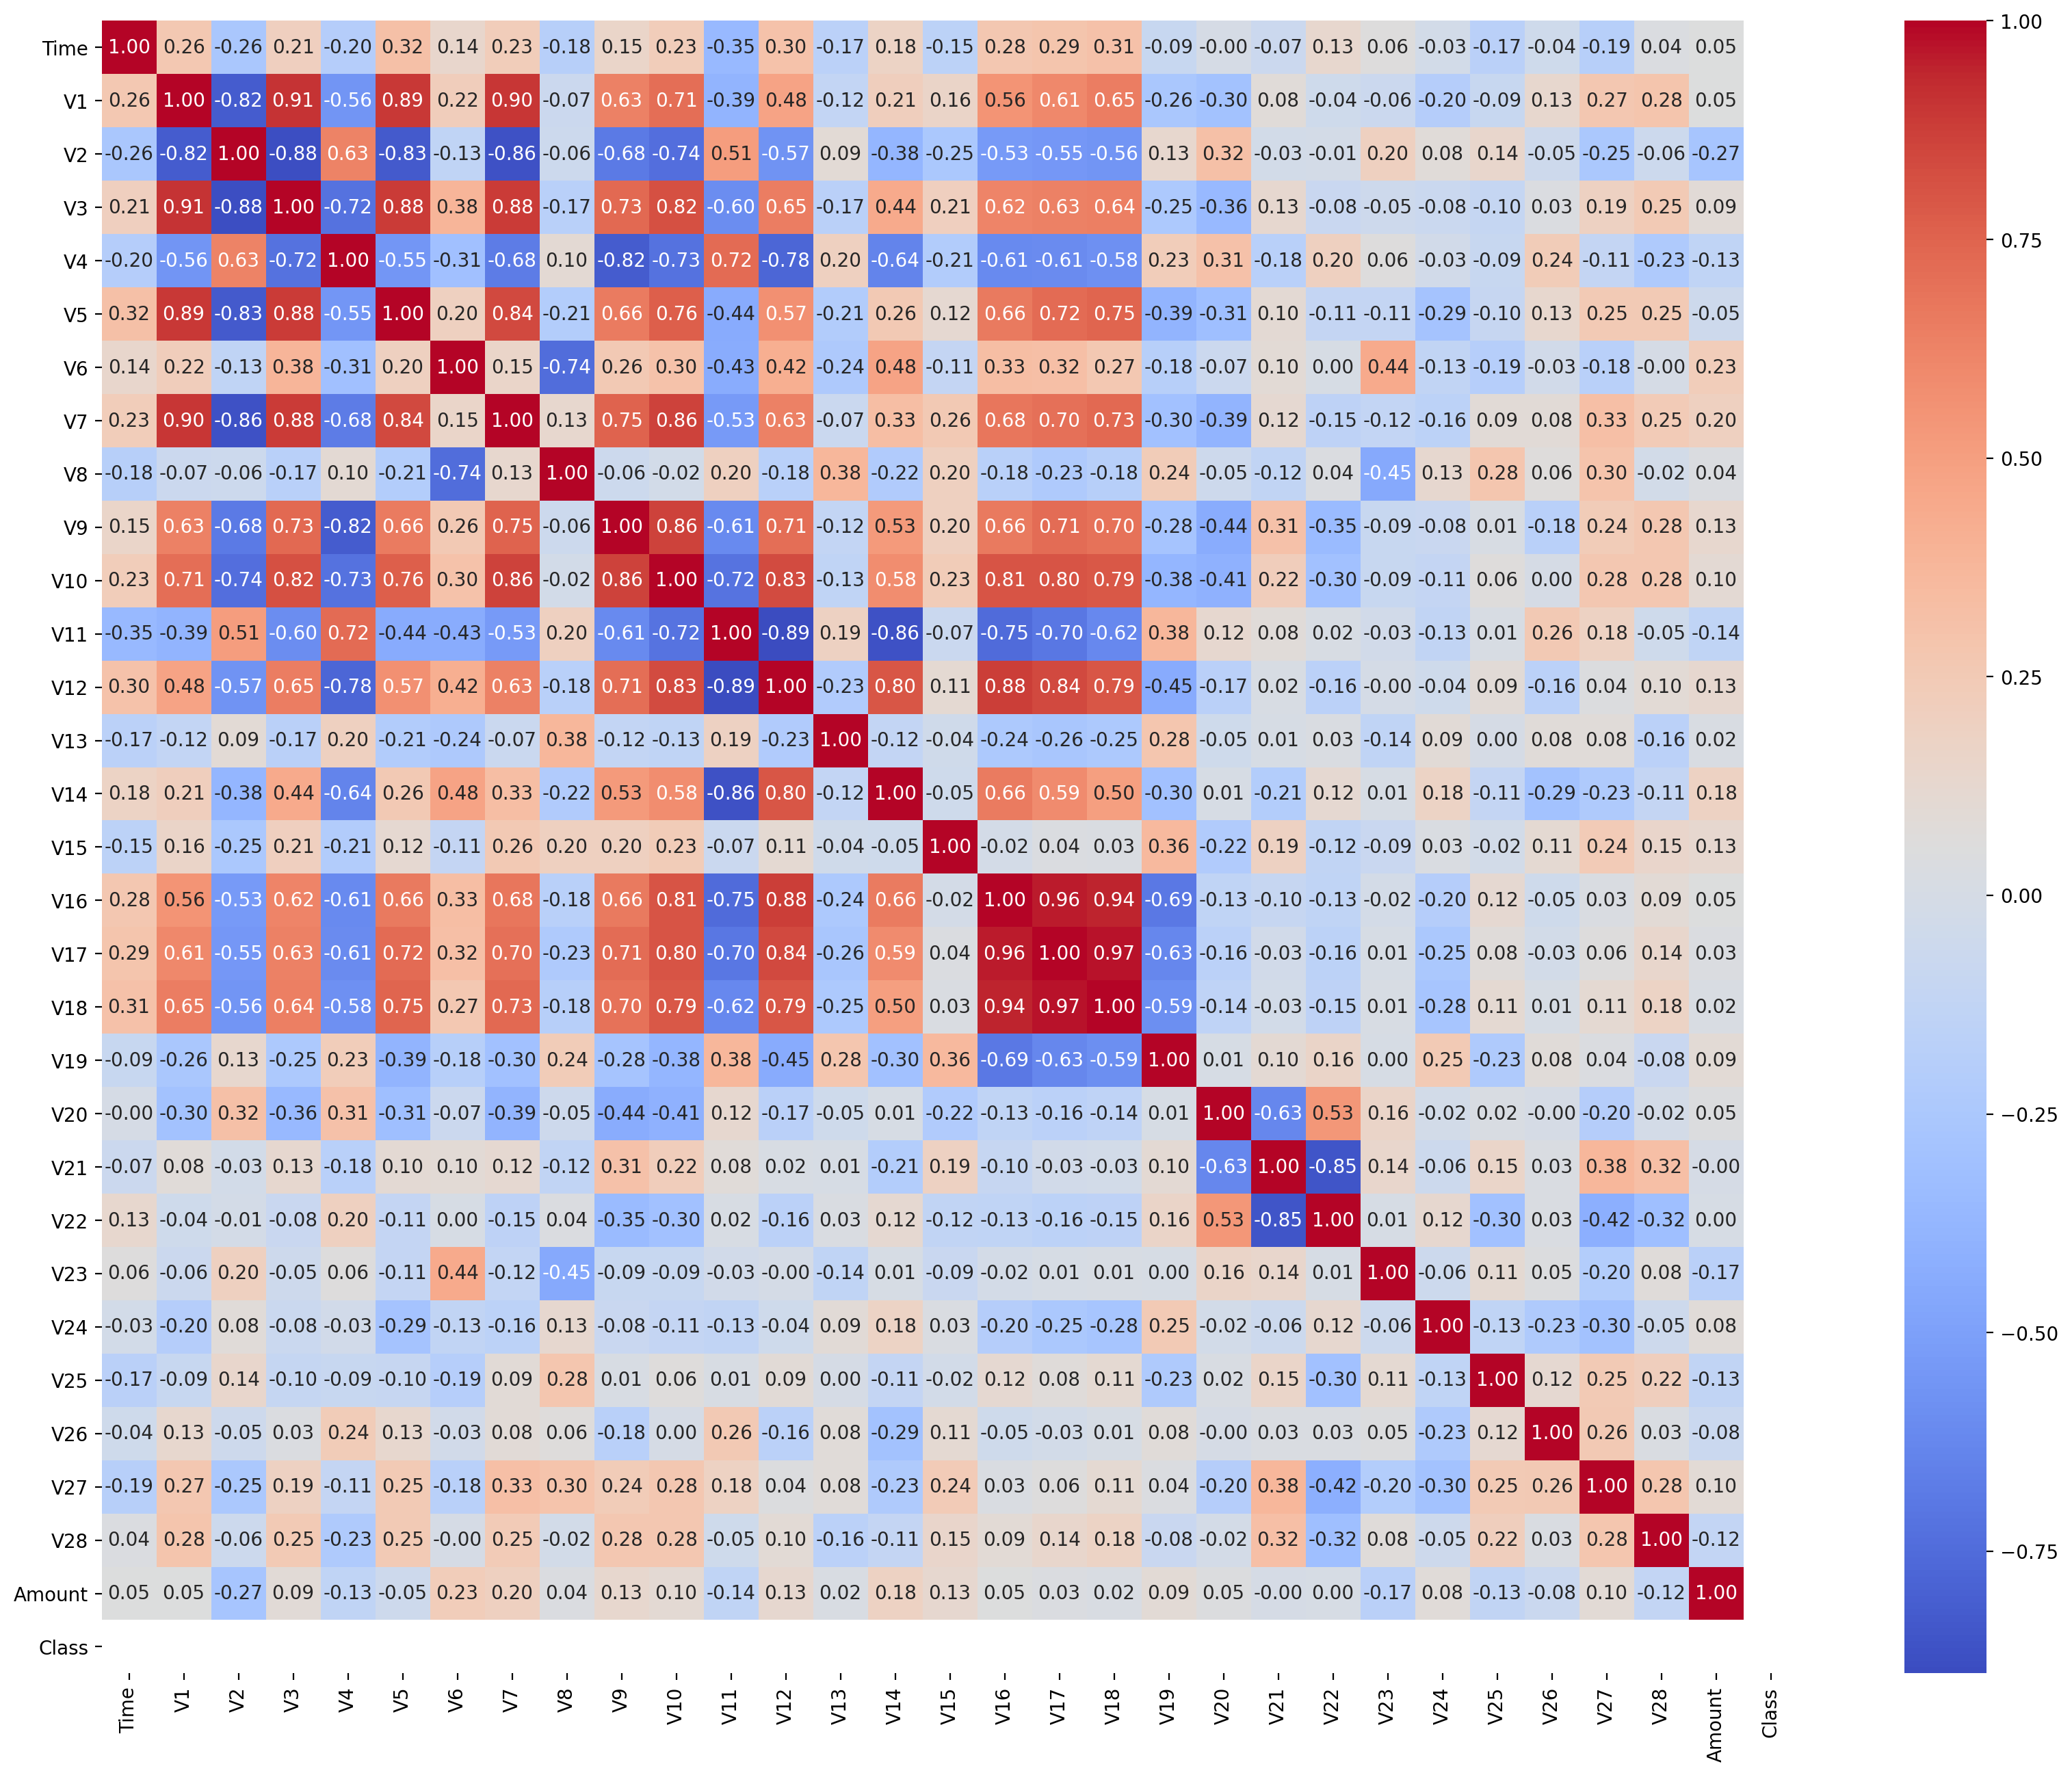

In [12]:
plt.figure(figsize=(20,16), dpi=200)
sns.heatmap(fraud.corr(), cmap="coolwarm", annot=True, fmt=".2f");

* ***Fraud data özelinde, V1-V18 arası sütunların birçoğunun kendi aralarında yüksek kolerasyonu olduğunu görülmektedir.***

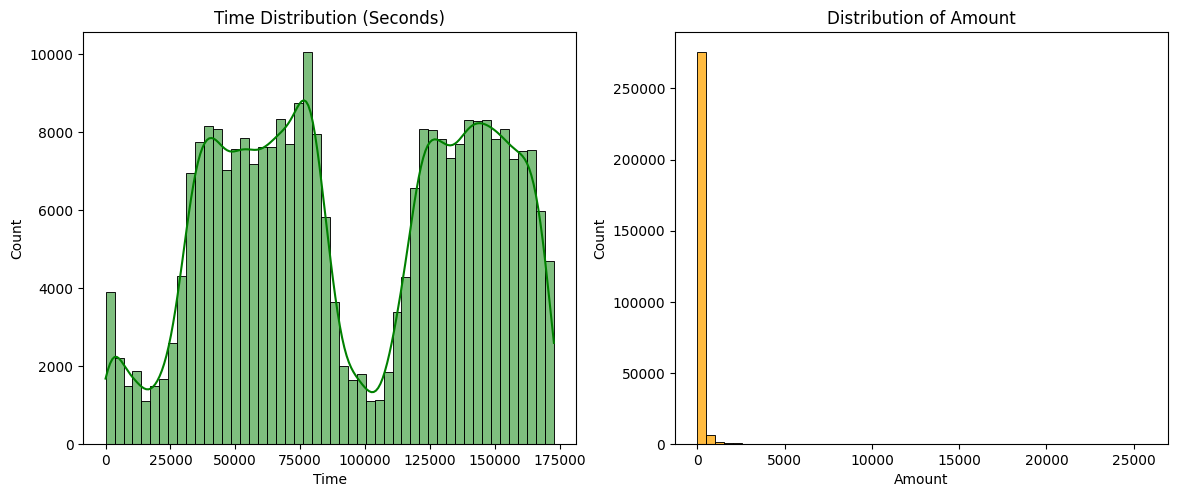

In [14]:
plt.figure(figsize=(14,12), dpi=100)

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')
sns.histplot(df['Time'], color='green', bins=50, kde=True);

plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.histplot(df['Amount'], color='orange', bins=50);

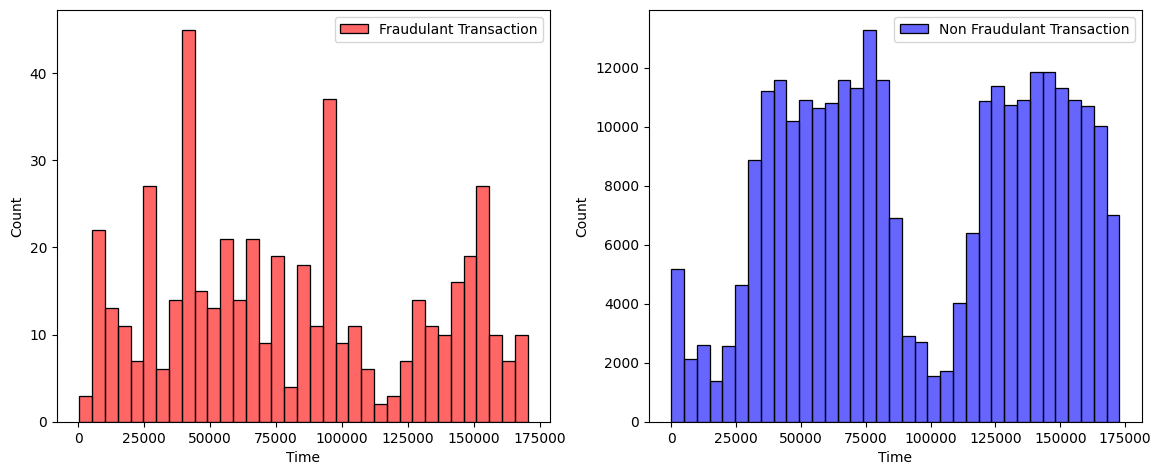

In [15]:
plt.figure(figsize=(14, 12), dpi=100)

plt.subplot(2, 2, 1)
sns.histplot(data=df[df.Class == 1].Time, bins=35, color='red', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
sns.histplot(data=df[df.Class == 0].Time, bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend();

* ***"Time" sütununun genel olarak yapılan işlemlerde belirleyici ve anlamlı bir rolü olmadığı söylenebilir.*** 

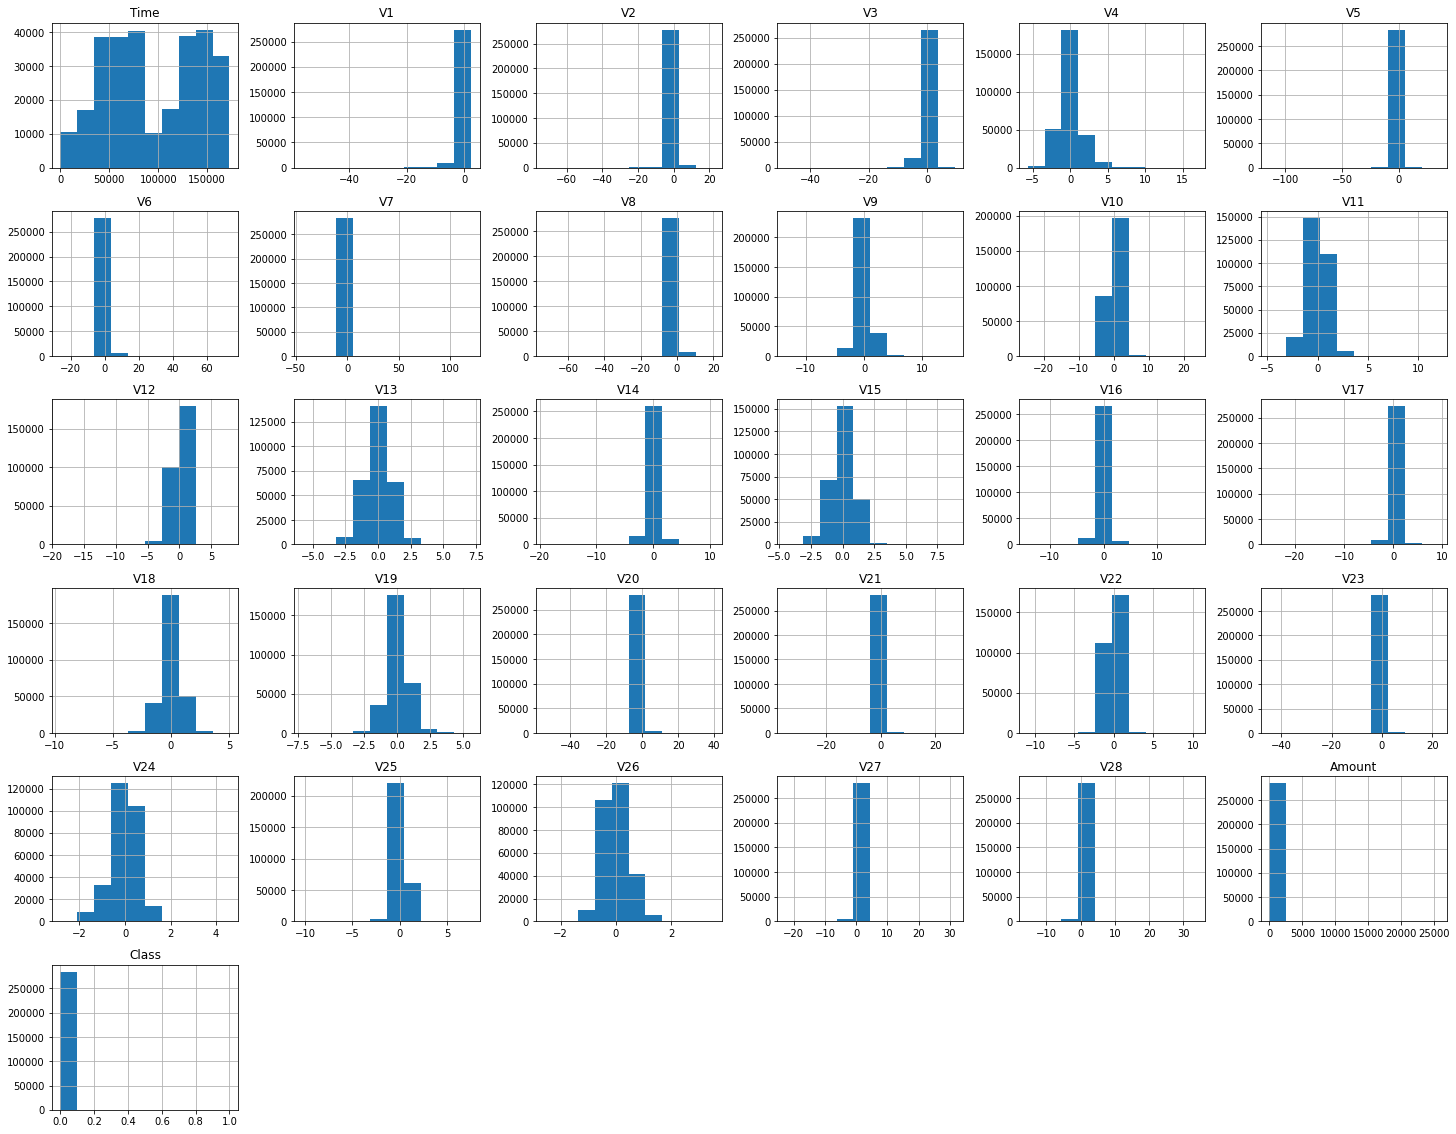

In [16]:
df.hist(figsize=(25,20));

### Data Cleaning
Check Missing Values and Outliers

In [17]:
df.isnull().sum().any()

False

In [18]:
def detect_outliers(dff:pd.DataFrame, col_name:str, p=1.5) ->int:

    first_quartile = np.percentile(np.array(dff[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(dff[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(p*IQR)
    lower_limit = first_quartile-(p*IQR)
    outlier_count = 0
                      
    for value in dff[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [126]:
iqr=3
print(f"Number of Outliers for {iqr}*IQR after Logarithmed\n")

total=0
for col in df.columns:
    if detect_outliers(df, col)[2] > 0:
        outliers=detect_outliers(df, col, iqr)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for 3*IQR after Logarithmed

1994 outliers in 'V1'
4453 outliers in 'V2'
762 outliers in 'V3'
479 outliers in 'V4'
2321 outliers in 'V5'
5389 outliers in 'V6'
3051 outliers in 'V7'
11285 outliers in 'V8'
1077 outliers in 'V9'
3208 outliers in 'V10'
154 outliers in 'V11'
1305 outliers in 'V12'
2 outliers in 'V13'
2405 outliers in 'V14'
18 outliers in 'V15'
588 outliers in 'V16'
1449 outliers in 'V17'
283 outliers in 'V18'
628 outliers in 'V19'
13385 outliers in 'V20'
6934 outliers in 'V21'
193 outliers in 'V22'
8135 outliers in 'V23'
137 outliers in 'V24'
452 outliers in 'V25'
514 outliers in 'V26'
16524 outliers in 'V27'
12573 outliers in 'V28'
18941 outliers in 'Amount'
492 outliers in 'Class'

119131 OUTLIERS TOTALLY


In [1]:
119131/284807  # 3 IQR Outlier Percentage

0.41828676963698225

In [125]:
iqr=4
print(f"Number of Outliers for {iqr}*IQR after Logarithmed\n")

total=0
for col in df.columns:
    if detect_outliers(df, col)[2] > 0:
        outliers=detect_outliers(df, col, iqr)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for 4*IQR after Logarithmed

1040 outliers in 'V1'
2480 outliers in 'V2'
412 outliers in 'V3'
182 outliers in 'V4'
1296 outliers in 'V5'
1050 outliers in 'V6'
1817 outliers in 'V7'
8219 outliers in 'V8'
452 outliers in 'V9'
2138 outliers in 'V10'
93 outliers in 'V11'
370 outliers in 'V12'
1 outliers in 'V13'
1028 outliers in 'V14'
6 outliers in 'V15'
281 outliers in 'V16'
698 outliers in 'V17'
159 outliers in 'V18'
58 outliers in 'V19'
9198 outliers in 'V20'
4877 outliers in 'V21'
77 outliers in 'V22'
5500 outliers in 'V23'
26 outliers in 'V24'
107 outliers in 'V25'
98 outliers in 'V26'
11149 outliers in 'V27'
8371 outliers in 'V28'
14294 outliers in 'Amount'
492 outliers in 'Class'

75969 OUTLIERS TOTALLY


In [127]:
75969/284807  # 4 IQR Outlier Percentage

0.2667385281962873

* ***Genel olarak "Domain Knowledge" konusunda herhangi bir fikrimizin olmadığı ve yüksek oranda outlier mevcut olduğu göz önüne alındığında , outlier temizliği yapılmaması uygun görülmüştür.***

In [22]:
print(df.duplicated().value_counts())
print("\n")
print(df.duplicated().value_counts(normalize=True) * 100)

False    283726
True       1081
dtype: int64


False   99.62
True     0.38
dtype: float64


* ***Tekrarlanan satır sayısı %0.38 gibi çok küçük bir oranda olduğu için önemsenmemiştir.***

---
---


## 2. Data Preprocessing

#### Scaling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

In [24]:
scaler = StandardScaler()

* ***StandardScaler ve RobustScaler hemen hemen aynı sonuçları vermektedir.***

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [25]:
X = df.drop('Class', axis=1)
y = df.Class

In [26]:
X_train, X_test_v, y_train, y_test_v = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test_v, y_test_v, test_size=0.5, random_state=42, stratify=y_test_v)

In [27]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [28]:
y_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [130]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"VALIDATION: X_val: {X_val.shape}, y_val: {y_val.shape}")

TRAINING: X_train: (199364, 30), y_train: (199364,)
TESTING: X_test: (42722, 30), y_test: (42722,)


---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Import Libraries***

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, precision_score, accuracy_score, recall_score, f1_score

***ii. Model Training***

In [31]:
log_model = LogisticRegression()

In [32]:
log_model.fit(X_train, y_train)

LogisticRegression()

***iii. Prediction and Model Evaluating***

In [33]:
y_pred = log_model.predict(X_val)

In [34]:
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[42636    11]
 [   30    44]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42647
           1       0.80      0.59      0.68        74

    accuracy                           1.00     42721
   macro avg       0.90      0.80      0.84     42721
weighted avg       1.00      1.00      1.00     42721



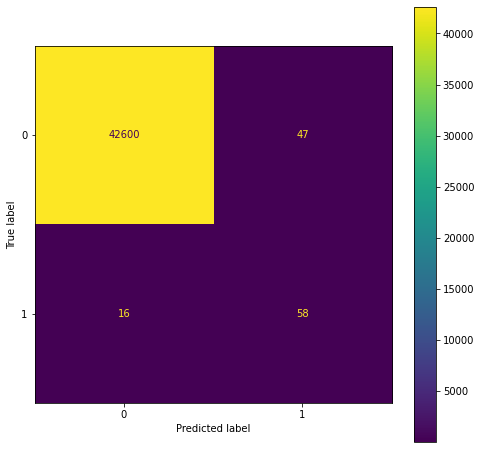

In [135]:
plt.rcParams["figure.figsize"] = [8, 8]
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, y_pred), display_labels=log_model.classes_).plot();


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


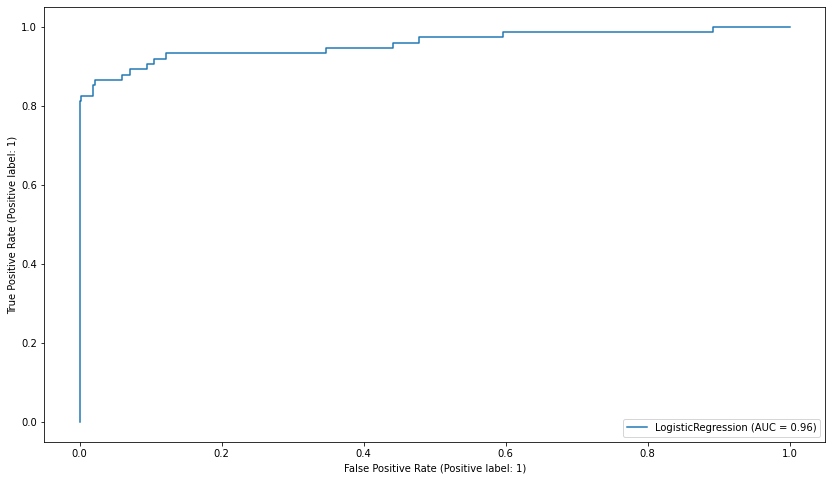

In [36]:
plot_roc_curve(log_model, X_val, y_val);

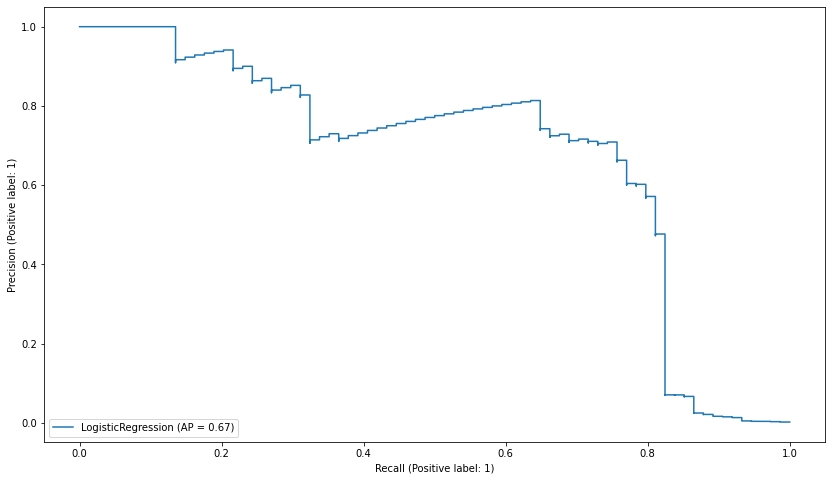

In [37]:
plot_precision_recall_curve(log_model, X_val, y_val);

***v. Apply and Plot StratifiedKFold***

In [38]:
from sklearn.model_selection import StratifiedKFold

In [39]:
def Learning(n, est, X, y):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    for train_index, test_index in skf.split(X, y):
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        acc_scores.append(est.score(X_test, y_test))
        pre_scores.append(precision_score(y_test, y_pred, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred, pos_label=1))
    print(f'Accuracy: %{np.mean(acc_scores)*100:.4f} std %{np.std(acc_scores)*100:.2f}')
    print(f'Precision 1: %{np.mean(pre_scores)*100:.4f} std %{np.std(pre_scores)*100:.2f}')
    print(f'Recall 1: %{np.mean(rec_scores)*100:.4f} std %{np.std(rec_scores)*100:.2f}')
    print(f'F1_score 1: %{np.mean(f1_scores)*100:.4f} std  %{np.std(f1_scores)*100:.2f}')

In [40]:
Learning(10, LogisticRegression(C = 10), X, y)

Accuracy: %99.8957 std %0.01
Precision 1: %72.5173 std %6.06
Recall 1: %65.2449 std %3.20
F1_score 1: %68.4245 std  %1.69


- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE

In [41]:
# pip install imblearn

In [42]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [43]:
oversample = SMOTE()

In [44]:
X_train.shape

(199364, 30)

### Logistic Regression with SMOTE

- The steps you are going to cover for this algorithm are as follows:
   
   *i. Train-Test Split (Again)*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Train-Test Split (Again)***

Use SMOTE applied data.

In [45]:
X_train_ovs, y_train_ovs = oversample.fit_resample(X_train, y_train)

In [46]:
X_train_ovs.shape

(398040, 30)

***ii. Model Training***

In [47]:
log_model_smote = LogisticRegression()

In [48]:
log_model_smote.fit(X_train_ovs, y_train_ovs)

LogisticRegression()

***iii. Prediction and Model Evaluating***

In [49]:
y_pred = log_model_smote.predict(X_val)

In [50]:
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[41717   930]
 [    9    65]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     42647
           1       0.07      0.88      0.12        74

    accuracy                           0.98     42721
   macro avg       0.53      0.93      0.56     42721
weighted avg       1.00      0.98      0.99     42721



***iv.  Plot Precision and Recall Curve***


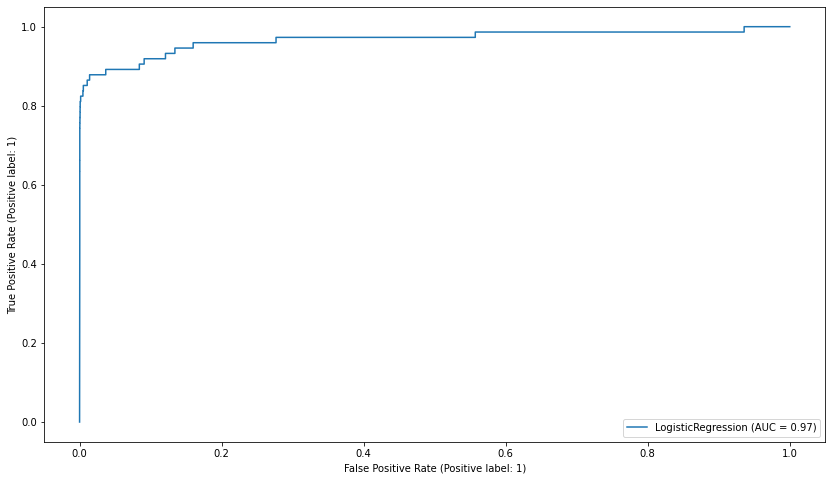

In [51]:
plot_roc_curve(log_model_smote, X_val, y_val);

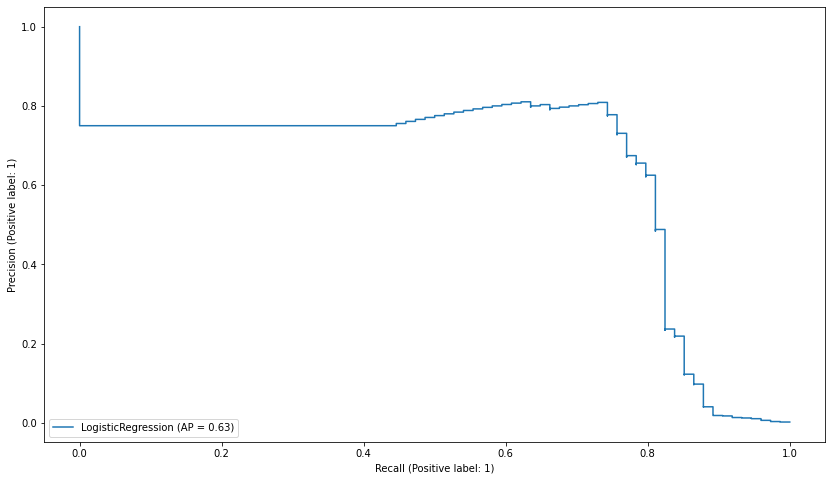

In [52]:
plot_precision_recall_curve(log_model_smote, X_val, y_val);

***v. Apply and Plot StratifiedKFold***

In [53]:
def Learning(n, est, X, y):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    for train_index, test_index in skf.split(X, y):
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        X_train_ovs, y_train_ovs = oversample.fit_resample(X_train, y_train)
        est = est
        est.fit(X_train_ovs, y_train_ovs)
        y_pred = est.predict(X_test)
        acc_scores.append(est.score(X_test, y_test))
        pre_scores.append(precision_score(y_test, y_pred, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred, pos_label=1))
    print(f'Accuracy: %{np.mean(acc_scores)*100:.4f} std %{np.std(acc_scores)*100:.2f}')
    print(f'Precision 1: %{np.mean(pre_scores)*100:.4f} std %{np.std(pre_scores)*100:.2f}')
    print(f'Recall 1: %{np.mean(rec_scores)*100:.4f} std %{np.std(rec_scores)*100:.2f}')
    print(f'F1_score 1: %{np.mean(f1_scores)*100:.4f} std  %{np.std(f1_scores)*100:.2f}')
    print(rec_scores)

In [54]:
Learning(10, LogisticRegression(C = 10), X, y)

Accuracy: %97.6356 std %0.63
Precision 1: %6.4840 std %1.49
Recall 1: %88.5959 std %4.50
F1_score 1: %12.0505 std  %2.63
[0.8163265306122449, 0.8979591836734694, 0.9387755102040817, 0.8775510204081632, 0.8775510204081632, 0.98, 0.9, 0.8775510204081632, 0.8571428571428571, 0.8367346938775511]


### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

In [55]:
from sklearn.ensemble import RandomForestClassifier

***ii. Prediction and Model Evaluating***

In [56]:
rf_model = RandomForestClassifier()

In [57]:
rf_model.fit(X_train_ovs, y_train_ovs)

RandomForestClassifier()

In [58]:
y_pred = rf_model.predict(X_test)

In [59]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[42641     7]
 [   15    59]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42648
           1       0.89      0.80      0.84        74

    accuracy                           1.00     42722
   macro avg       0.95      0.90      0.92     42722
weighted avg       1.00      1.00      1.00     42722



***iii. Plot Precision and Recall Curve***


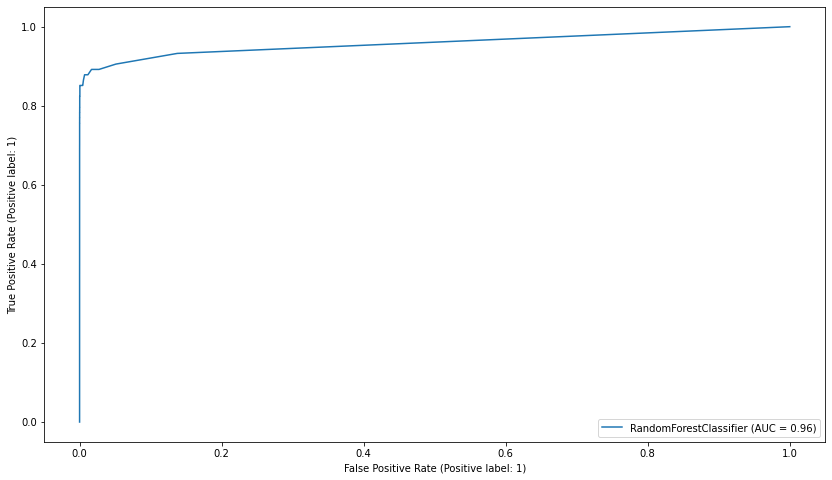

In [60]:
plot_roc_curve(rf_model, X_test, y_test);

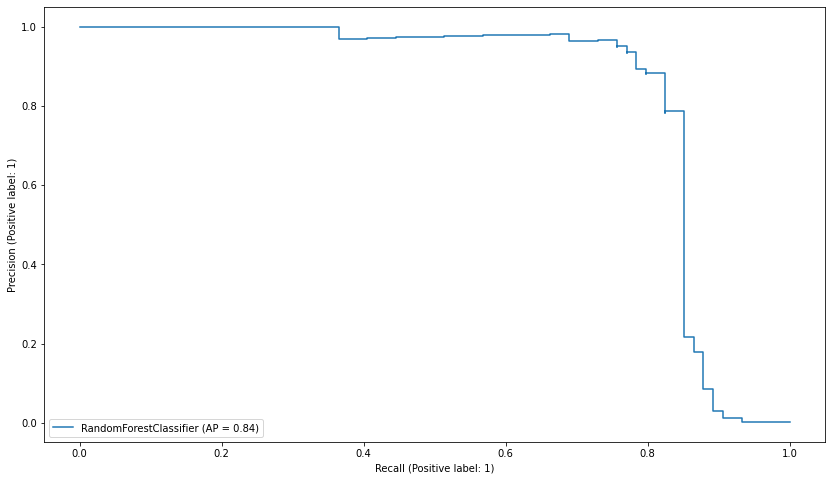

In [61]:
plot_precision_recall_curve(rf_model, X_test, y_test);

***iv. Apply and Plot StratifiedKFold***

In [62]:
def Learning(n, est, X, y):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    for train_index, test_index in skf.split(X, y):
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        X_train_ovs, y_train_ovs = oversample.fit_resample(X_train, y_train)
        est = est
        est.fit(X_train_ovs, y_train_ovs)
        y_pred = est.predict(X_test)
        acc_scores.append(est.score(X_test, y_test))
        pre_scores.append(precision_score(y_test, y_pred, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred, pos_label=1))
    print(f'Accuracy: %{np.mean(acc_scores)*100:.4f} std %{np.std(acc_scores)*100:.2f}')
    print(f'Precision 1: %{np.mean(pre_scores)*100:.4f} std %{np.std(pre_scores)*100:.2f}')
    print(f'Recall 1: %{np.mean(rec_scores)*100:.4f} std %{np.std(rec_scores)*100:.2f}')
    print(f'F1_score 1: %{np.mean(f1_scores)*100:.4f} std  %{np.std(f1_scores)*100:.2f}')

In [114]:
# Learning(10, RandomForestClassifier(), X, y)

Accuracy: %99.9540 std %0.01
Precision 1: %89.4909 std %5.16
Recall 1: %83.3265 std %3.03
F1_score 1: %86.2612 std  %3.74


### Feature Importance

In [140]:
rf_model.feature_importances_

array([0.00734152, 0.00912378, 0.01441199, 0.04723879, 0.14046512,
       0.01053996, 0.00889897, 0.02328595, 0.0107423 , 0.01557606,
       0.08849418, 0.07259827, 0.11936245, 0.00822623, 0.18699453,
       0.00537386, 0.04098503, 0.08855841, 0.01708473, 0.0098167 ,
       0.00616413, 0.02205054, 0.00456616, 0.0052553 , 0.00366795,
       0.00595473, 0.00741008, 0.00792245, 0.00696245, 0.00492737])

In [141]:
feats = pd.DataFrame(index=X.columns, data=rf_model.feature_importances_, columns=['Importance'])

In [142]:
imp_feats = feats.sort_values("Importance")

In [143]:
ord = imp_feats.sort_values("Importance", ascending=False)

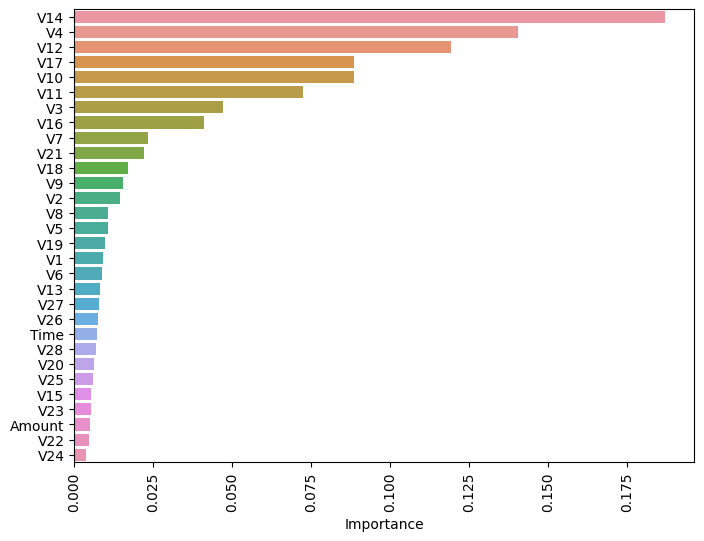

In [144]:
plt.figure(figsize=(8,6), dpi=100)
sns.barplot(data=imp_feats.sort_values('Importance'), y=imp_feats.sort_values('Importance').index, x='Importance', order=ord.index)

plt.xticks(rotation=90);

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [64]:
# pip install tensorflow==2.4.0 --user

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import average_precision_score

***ii. Define Model***

In [115]:
X_train.shape

(199364, 30)

In [67]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(15, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.0001)

***iii. Compile Model***

In [68]:
model.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics=["Recall"])

***iv. Fit Model***

In [69]:
early_stop = EarlyStopping(monitor="val_loss", mode="auto", verbose=1, patience=3, restore_best_weights=True)

In [70]:
# weights = {0:1, 1:99}

In [71]:
# model.fit(x = X_train, y = y_train, validation_data=(X_val, y_val), batch_size=128, epochs=50, callbacks=[early_stop], weights=weights)

In [72]:
model.fit(x = X_train_ovs, y = y_train_ovs, validation_data=(X_val, y_val), batch_size=128, epochs=50, callbacks=[early_stop])

Epoch 1/50
3110/3110 [==============================] - 10s 3ms/step - loss: 0.2952 - recall: 0.8332 - val_loss: 0.0755 - val_recall: 0.8514
Epoch 2/50
3110/3110 [==============================] - 7s 2ms/step - loss: 0.0718 - recall: 0.9693 - val_loss: 0.0460 - val_recall: 0.8378
Epoch 3/50
3110/3110 [==============================] - 7s 2ms/step - loss: 0.0404 - recall: 0.9877 - val_loss: 0.0287 - val_recall: 0.8243
Epoch 4/50
3110/3110 [==============================] - 7s 2ms/step - loss: 0.0269 - recall: 0.9943 - val_loss: 0.0238 - val_recall: 0.8108
Epoch 5/50
3110/3110 [==============================] - 7s 2ms/step - loss: 0.0192 - recall: 0.9968 - val_loss: 0.0201 - val_recall: 0.8108
Epoch 6/50
3110/3110 [==============================] - 7s 2ms/step - loss: 0.0152 - recall: 0.9978 - val_loss: 0.0173 - val_recall: 0.8108
Epoch 7/50
3110/3110 [==============================] - 7s 2ms/step - loss: 0.0135 - recall: 0.9983 - val_loss: 0.0164 - val_recall: 0.8108
Epoch 8/50
3110/311

***v. Prediction and Model Evaluating***

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
batch_normalization_1 (Batch (None, 15)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 1,591
Trainable params: 1,501
Non-trainable params: 90
_________________________________________________________________


In [74]:
model.history.history

{'loss': [0.17743024230003357,
  0.06211428716778755,
  0.03641162067651749,
  0.024791179224848747,
  0.018371080979704857,
  0.014651033096015453,
  0.012392394244670868,
  0.010436119511723518,
  0.008999466896057129,
  0.008007777854800224,
  0.007333145011216402,
  0.006451345048844814,
  0.00607518944889307,
  0.005611424800008535,
  0.005201914347708225,
  0.004802978131920099,
  0.004434993024915457,
  0.004103322979062796,
  0.0038919674698263407,
  0.003858687123283744,
  0.0036150335799902678,
  0.0032389473635703325,
  0.0032415874302387238,
  0.002944473410025239,
  0.0029987439047545195,
  0.002997922245413065,
  0.002800924004986882,
  0.002692869631573558,
  0.002499952679499984,
  0.0023423712700605392,
  0.0023520132526755333],
 'recall': [0.9070395231246948,
  0.9755703210830688,
  0.9897598028182983,
  0.9949100613594055,
  0.9970806837081909,
  0.997854471206665,
  0.9983670115470886,
  0.9986282587051392,
  0.9988594055175781,
  0.9989950656890869,
  0.99900007247

In [75]:
pd.set_option("display.float", "{:.5f}".format)
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,recall,val_loss,val_recall
0,0.17743,0.90704,0.07549,0.85135
1,0.06211,0.97557,0.04597,0.83784
2,0.03641,0.98976,0.02874,0.82432
3,0.02479,0.99491,0.02384,0.81081
4,0.01837,0.99708,0.02012,0.81081
5,0.01465,0.99785,0.01726,0.81081
6,0.01239,0.99837,0.01641,0.81081
7,0.01044,0.99863,0.01451,0.79730
8,0.00900,0.99886,0.01309,0.79730
9,0.00801,0.99900,0.01330,0.79730


In [76]:
y_pred = model.predict_classes(X_val)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [77]:
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[42600    47]
 [   16    58]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42647
           1       0.55      0.78      0.65        74

    accuracy                           1.00     42721
   macro avg       0.78      0.89      0.82     42721
weighted avg       1.00      1.00      1.00     42721



***vi. Plot Precision and Recall Curve***

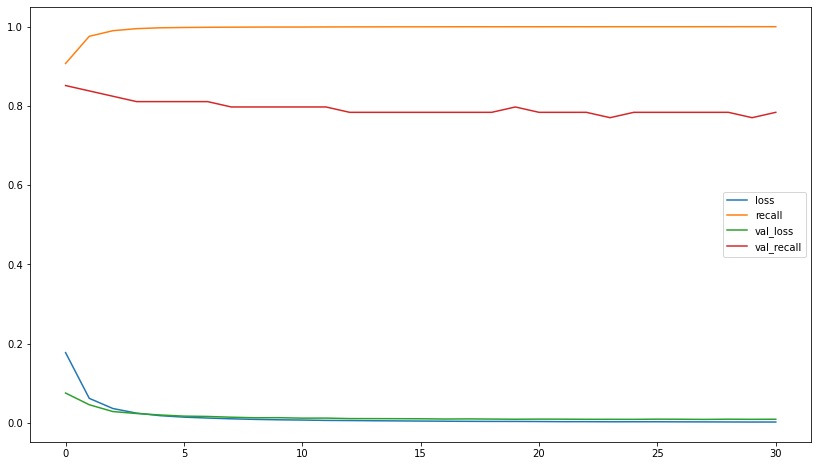

In [78]:
loss_df.plot();

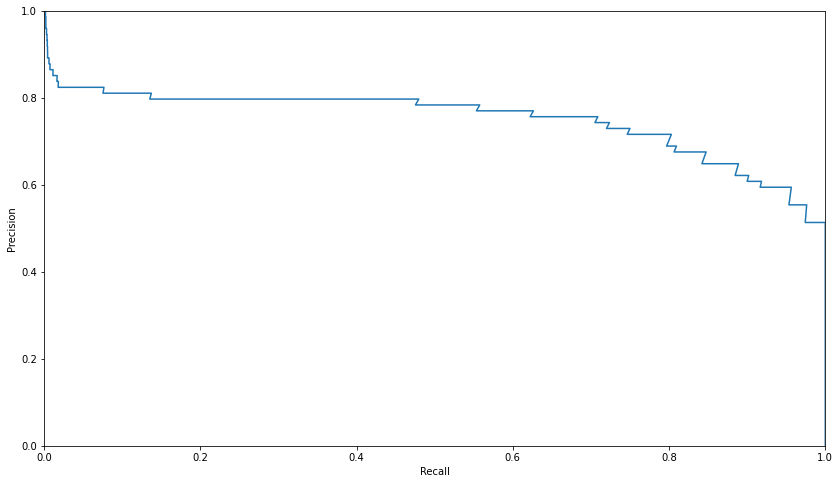

In [79]:
y_val_prob = model.predict_proba(X_val)
fpr , tpr , thresholds = precision_recall_curve (y_val , y_val_prob)
def plot_pre_rec_curve(fpr,tpr):
  plt.plot(fpr,tpr)
  plt.axis([0,1,0,1])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.show()
plot_pre_rec_curve(fpr,tpr);

* ***DL modellerinde predict fonksiyonu çalışmadığından, ROC/AUC ve precision recall curve'leri manuel olarak çizdiriyoruz***

In [80]:
AP = average_precision_score(y_val , y_val_prob)
AP

0.7519101720655121

### Final Modeling and Prediction

In [145]:
final_model = RandomForestClassifier(random_state=42).fit(X, y)

In [146]:
my_dict = {"V14":-5, "V4":5, "V12":-3, "V17":-8, "V10":14, "V11": 4}

In [147]:
my_dict = pd.DataFrame([my_dict])
my_dict

,V14,V4,V12,V17,V10,V11
0,-5,5,-3,-8,14,4


In [148]:
my_dict = pd.get_dummies(my_dict).reindex(columns=X.columns, fill_value=0)
my_dict

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
my_dict.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [150]:
final_model.predict(my_dict)

array([1], dtype=int64)

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to *Pycharm* and create your web app with Flask API.

### Save and Export the Model as .pkl


In [136]:
import pickle

In [151]:
pickle.dump(final_model, open("final_model_rf", 'wb'))

### Save and Export Variables as .pkl

In [138]:
scaler_fraud = scaler.fit(X)

In [153]:
pickle.dump(scaler_fraud, open("scaler_fraud", 'wb'))

In [154]:
pickle.dump(my_dict.columns, open("columns_fraud", 'wb'))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___